# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Maulana Muhammad
- **Email:** maulanamuhammad2000@gmail.com
- **ID Dicoding:** maoelana

## Menentukan Pertanyaan Bisnis

- Bagaimana pola penyewaan sepeda berdasarkan musim dan bulan? 
- Apa efek dari berbagai kondisi cuaca terhadap jumlah penyewaan sepeda?
- Apakah hari libur dan hari kerja mempengaruhi penyewaan sepeda?
- Bagaimana suhu dan kelembapan mempengaruhi penyewaan sepeda? 
- Bagaimana pola penyewaan sepeda berdasarkan tahun dan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

warnings.filterwarnings('ignore')

## Data Wrangling

### Gathering Data

In [2]:
day_df = pd.read_csv("Bike-sharing-dataset\day.csv")
day_df.head(5)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [3]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [4]:
total_nan = day_df.isna().sum().sum()
print("Total NaN: ", total_nan)

Total NaN:  0


In [5]:
print("Total duplicates: ", day_df.duplicated().sum())

Total duplicates:  0


In [6]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


### Cleaning Data

In [7]:
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

In [8]:
day_df.drop_duplicates(inplace=True)

In [9]:
day_df.dropna()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


check windspeed outlier

In [10]:
def plot_boxplot(data, column, title, xlabel, ax, palette='viridis'):
    sns.boxplot(x=data[column], ax=ax, palette=palette)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel('')

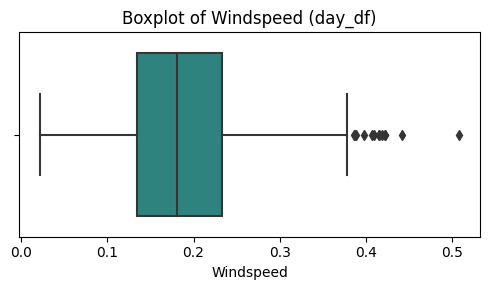

In [11]:
fig, ax = plt.subplots(figsize=(5, 3))
plot_boxplot(day_df, 'windspeed', 'Boxplot of Windspeed (day_df)', 'Windspeed', ax)
plt.tight_layout()
plt.show()

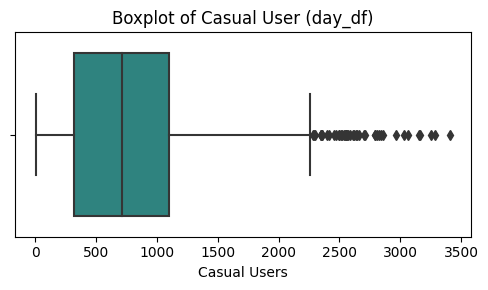

In [12]:
fig, ax = plt.subplots(figsize=(5, 3))
plot_boxplot(day_df, 'casual', 'Boxplot of Casual User (day_df)', 'Casual Users', ax)
plt.tight_layout()
plt.show()

In [13]:
def replace_outliers(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    maximum = Q3 + (1.5 * IQR)
    minimum = Q1 - (1.5 * IQR)

    lower_than = df[column_name] < minimum
    more_than = df[column_name] > maximum

    df.loc[lower_than, column_name] = minimum
    df.loc[more_than, column_name] = maximum

In [14]:
replace_outliers(day_df, 'windspeed')
replace_outliers(day_df, 'casual')

In [15]:
day_df['sum_check'] = day_df['casual'] + day_df['registered']
day_df['mismatch'] = day_df['sum_check'] != day_df['cnt']

if day_df['mismatch'].any():
    total_mismatch = day_df['mismatch'].sum()
    print("Total mismatch:", total_mismatch)
    '''print(day_df[day_df['mismatch']])'''

    day_df = day_df[~day_df['mismatch']]

day_df = day_df.drop(columns=['sum_check', 'mismatch'])

Total mismatch: 44


## Exploratory Data Analysis (EDA)

Text(0.5, 1.0, 'Correlation Matrix')

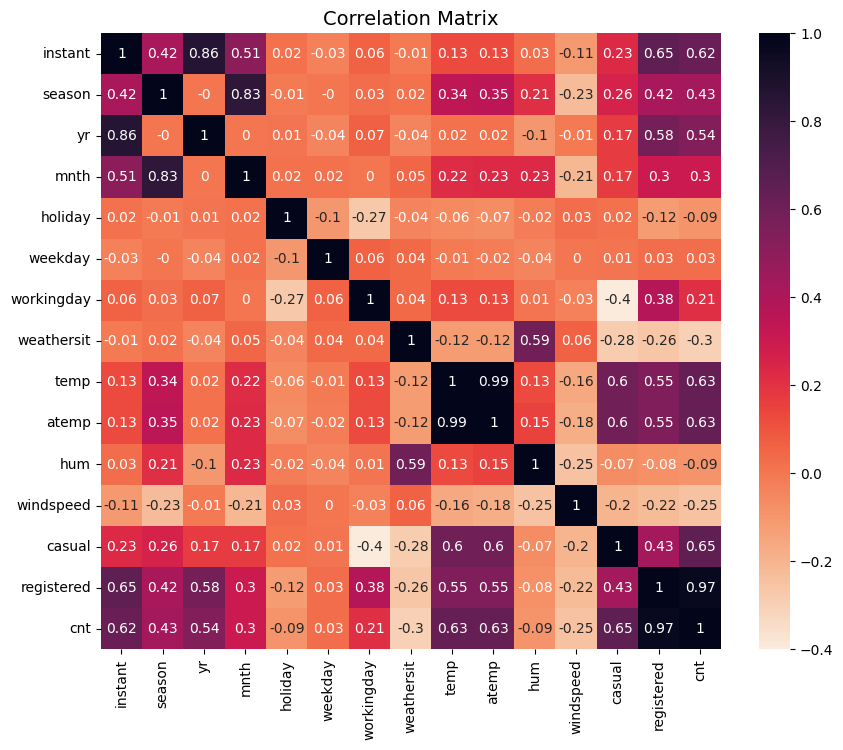

In [16]:
plt.figure(figsize = (10,8))
correlation_matrix = day_df.corr().round(2)

sns.heatmap(data = correlation_matrix, annot = True, cmap = 'rocket_r')
plt.title("Correlation Matrix", size = 14)

In [17]:
sns.set_theme(style="white")

def plot_numerical_distribution(data, numerical_columns, grid_size=(3, 3), palette="blue"):
    num_plots = len(numerical_columns)
    nrows, ncols = grid_size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        sns.histplot(data[col], kde=True, ax=axes[i], color=palette)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

def plot_categorical_distribution(data, categorical_columns, grid_size=(3, 3), palette="blue"):
    num_plots = len(categorical_columns)
    nrows, ncols = grid_size
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 5 * nrows))
    axes = axes.flatten()

    for i, col in enumerate(categorical_columns):
        sns.countplot(x=data[col], ax=axes[i], palette=palette)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Count')
    
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
categorical_columns = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

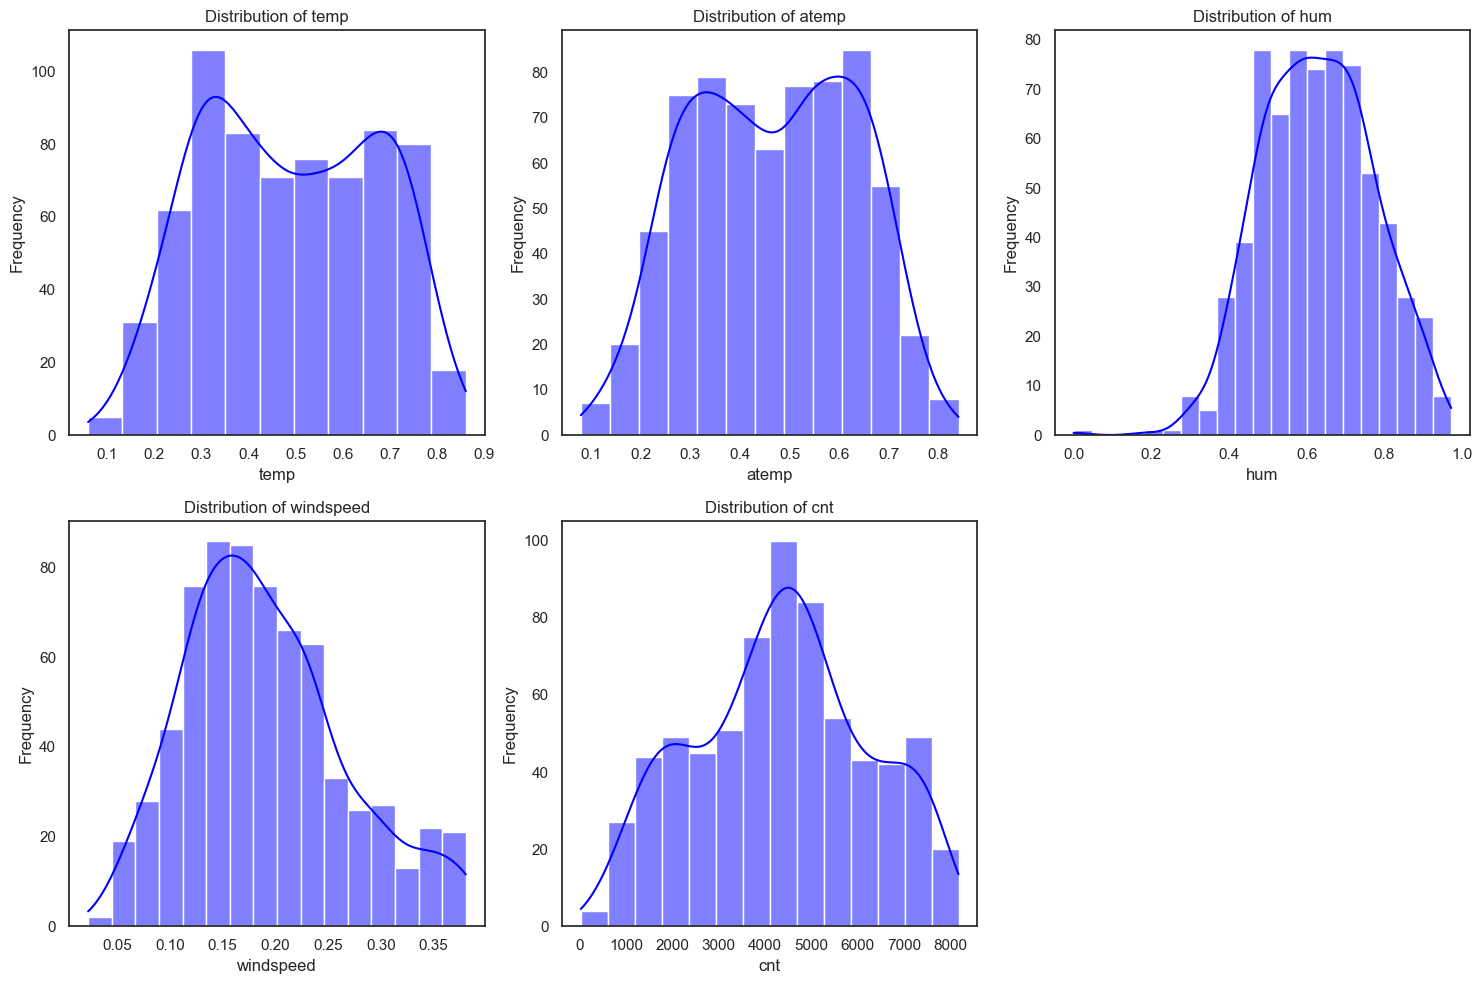

In [18]:
plot_numerical_distribution(day_df, numerical_columns, grid_size=(2, 3), palette="blue")

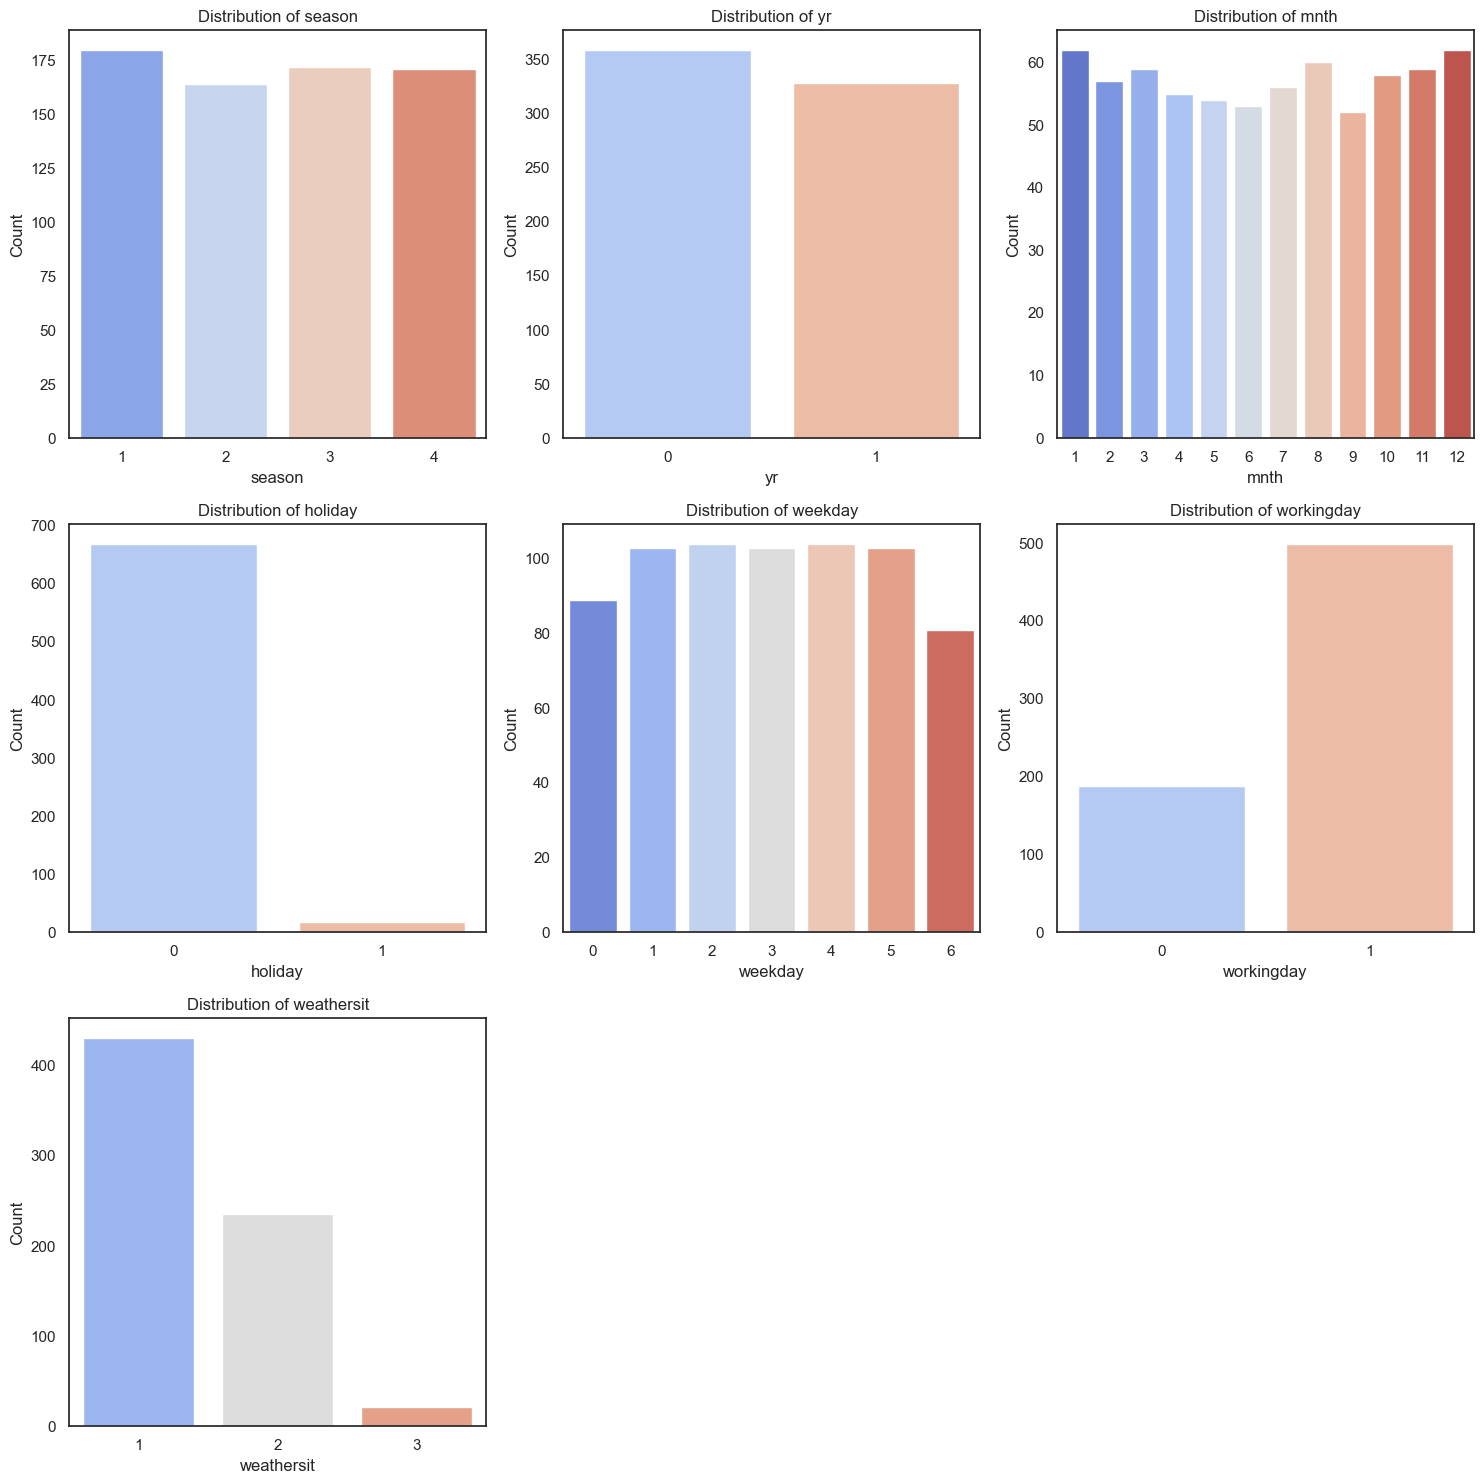

In [19]:
plot_categorical_distribution(day_df, categorical_columns, grid_size=(3, 3), palette="coolwarm")

In [20]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,687.000000,687,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
unique,NaN,687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,357.339156,NaN,2.486172,0.477438,6.512373,0.026201,2.965066,0.726346,1.403202,0.487475,0.467232,0.628917,0.190441,732.010189,3608.756914,4340.767103
std,212.261294,NaN,1.128493,0.499855,3.517065,0.159849,1.932219,0.446158,0.549732,0.184392,0.164292,0.143854,0.076463,521.433756,1580.356697,1866.258997
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,173.500000,NaN,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,1.000000,0.327917,0.326064,0.520000,0.134952,295.000000,2452.500000,3002.000000


In [21]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
mnth_map = {
    1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
    7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'
}
weathersit_map = {
    1: 'Clear', 
    2: 'Cloudy', 
    3: 'Rain/Snow'
}
holiday_map = {0: 'No', 1: 'Yes'}
workingday_map = {0: 'No', 1: 'Yes'}
yr_map = {0: 2011, 1: 2012}
weekday_map = {
    0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'
}

In [22]:
seasonal_stats = day_df.groupby('season')['cnt'].agg(['min', 'max', 'mean']).reset_index()
seasonal_stats['season'] = seasonal_stats['season'].map(season_map)

monthly_stats = day_df.groupby('mnth')['cnt'].agg(['min', 'max', 'mean']).reset_index()
monthly_stats['mnth'] = monthly_stats['mnth'].map(mnth_map)

print("Statistik Penyewaan Sepeda Berdasarkan Musim:")
print(seasonal_stats)
print("\nStatistik Penyewaan Sepeda Berdasarkan Bulan:")
print(monthly_stats)

Statistik Penyewaan Sepeda Berdasarkan Musim:
   season   min   max         mean
0  Spring   431  6312  2575.066667
1  Summer   795  7736  4745.402439
2    Fall  1115  8173  5531.790698
3  Winter    22  8156  4613.339181

Statistik Penyewaan Sepeda Berdasarkan Bulan:
         mnth   min   max         mean
0     January   431  4521  2176.338710
1    February  1005  5062  2655.298246
2       March   605  6871  3499.779661
3       April   795  7290  4272.363636
4         May  2633  7639  5148.018519
5        June  3767  7736  5548.188679
6        July  3285  8173  5474.125000
7      August  1115  7765  5608.416667
8   September  1842  8167  5525.057692
9     October    22  8156  5050.586207
10   November  1495  6536  4203.033898
11   December   441  6606  3403.806452


In [23]:
weather_stats = day_df.groupby('weathersit')['cnt'].agg(['min', 'max', 'mean']).reset_index()
weather_stats['weathersit'] = weather_stats['weathersit'].map(weathersit_map)

print("\nStatistik Penyewaan Sepeda Berdasarkan Kondisi Cuaca:")
print(weather_stats)


Statistik Penyewaan Sepeda Berdasarkan Kondisi Cuaca:
  weathersit  min   max         mean
0      Clear  431  8173  4704.431555
1     Cloudy  605  7582  3900.544681
2  Rain/Snow   22  4639  1803.285714


In [24]:
holiday_stats = day_df.groupby('holiday')['cnt'].agg(['min', 'max', 'mean']).reset_index()
holiday_stats['holiday'] = holiday_stats['holiday'].map(holiday_map)

workingday_stats = day_df.groupby('workingday')['cnt'].agg(['min', 'max', 'mean']).reset_index()
workingday_stats['workingday'] = workingday_stats['workingday'].map(workingday_map)

print("\nStatistik Penyewaan Sepeda Berdasarkan Hari Libur:")
print(holiday_stats)
print("\nStatistik Penyewaan Sepeda Berdasarkan Hari Kerja:")
print(workingday_stats)


Statistik Penyewaan Sepeda Berdasarkan Hari Libur:
  holiday   min   max         mean
0      No    22  8173  4369.448430
1     Yes  1000  6370  3274.777778

Statistik Penyewaan Sepeda Berdasarkan Hari Kerja:
  workingday  min   max         mean
0         No  605  7333  3713.079787
1        Yes   22  8173  4577.250501


In [25]:
temperature_stats = day_df[['temp', 'cnt']].agg(['min', 'max', 'mean'])
humidity_stats = day_df[['hum', 'cnt']].agg(['min', 'max', 'mean'])

print("\nStatistik Penyewaan Sepeda Berdasarkan Suhu:")
print(temperature_stats)
print("\nStatistik Penyewaan Sepeda Berdasarkan Kelembapan:")
print(humidity_stats)


Statistik Penyewaan Sepeda Berdasarkan Suhu:
          temp          cnt
min   0.059130    22.000000
max   0.861667  8173.000000
mean  0.487475  4340.767103

Statistik Penyewaan Sepeda Berdasarkan Kelembapan:
           hum          cnt
min   0.000000    22.000000
max   0.972500  8173.000000
mean  0.628917  4340.767103


In [26]:
yr_stats = day_df.groupby('yr')['cnt'].agg(['min', 'max', 'mean']).reset_index()
yr_stats['yr'] = yr_stats['yr'].map(yr_map)

weekday_stats = day_df.groupby('weekday')['cnt'].agg(['min', 'max', 'mean']).reset_index()
weekday_stats['weekday'] = weekday_stats['weekday'].map(weekday_map)

print("\nStatistik Penyewaan Sepeda Berdasarkan Tahun:")
print(yr_stats)
print("\nStatistik Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:")
print(weekday_stats)


Statistik Penyewaan Sepeda Berdasarkan Tahun:
     yr  min   max         mean
0  2011  431  5895  3373.952646
1  2012   22  8173  5398.957317

Statistik Penyewaan Sepeda Berdasarkan Hari dalam Seminggu:
     weekday   min   max         mean
0     Sunday   605  7333  3814.943820
1     Monday    22  7525  4305.019417
2    Tuesday   683  7767  4510.663462
3  Wednesday   441  8173  4520.825243
4   Thursday   431  7804  4667.259615
5     Friday  1167  8167  4654.640777
6   Saturday   627  7109  3698.555556


## Visualization & Explanatory Analysis

### Pertanyaan 1:  Bagaimana pola penyewaan sepeda berdasarkan bulan pada tahun 2011 dan 2012? 

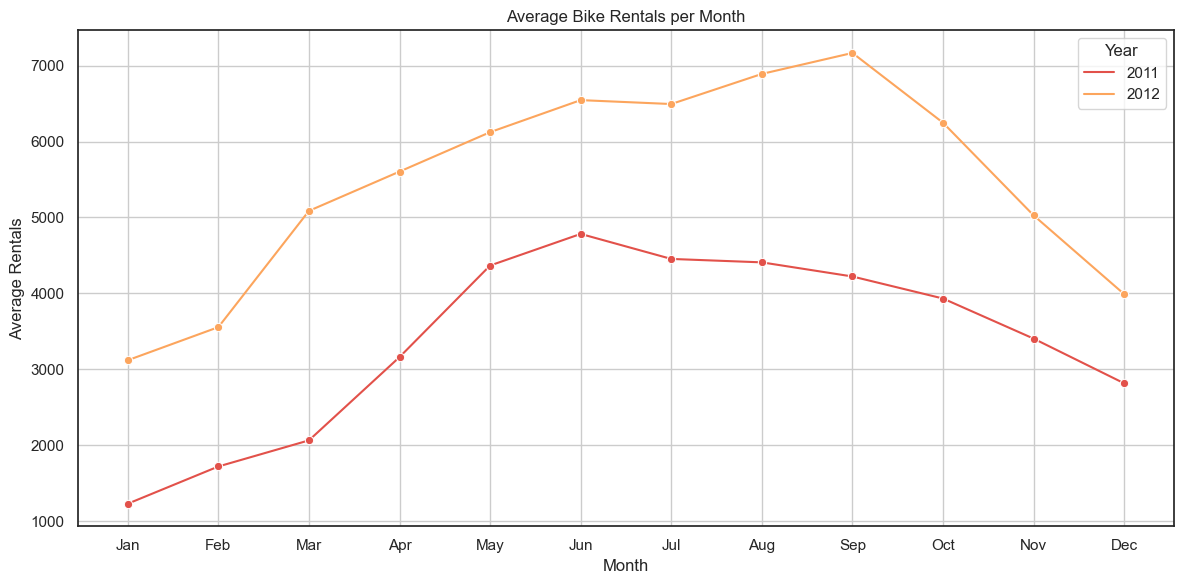

In [27]:
sns.set_theme(style="white", palette="Spectral")

monthly_avg = day_df.groupby(['yr', 'mnth'])['cnt'].mean().reset_index()

plt.figure(figsize=(12, 6))
plot = sns.lineplot(data=monthly_avg, x='mnth', y='cnt', hue='yr', marker='o')
plt.title('Average Bike Rentals per Month')
plt.xlabel('Month')
plt.ylabel('Average Rentals')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
handles, labels = plt.gca().get_legend_handles_labels()
new_labels = ['2011', '2012']
plt.legend(handles=handles, labels=new_labels, title='Year')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 2: Apa efek dari berbagai kondisi cuaca terhadap jumlah penyewaan sepeda?

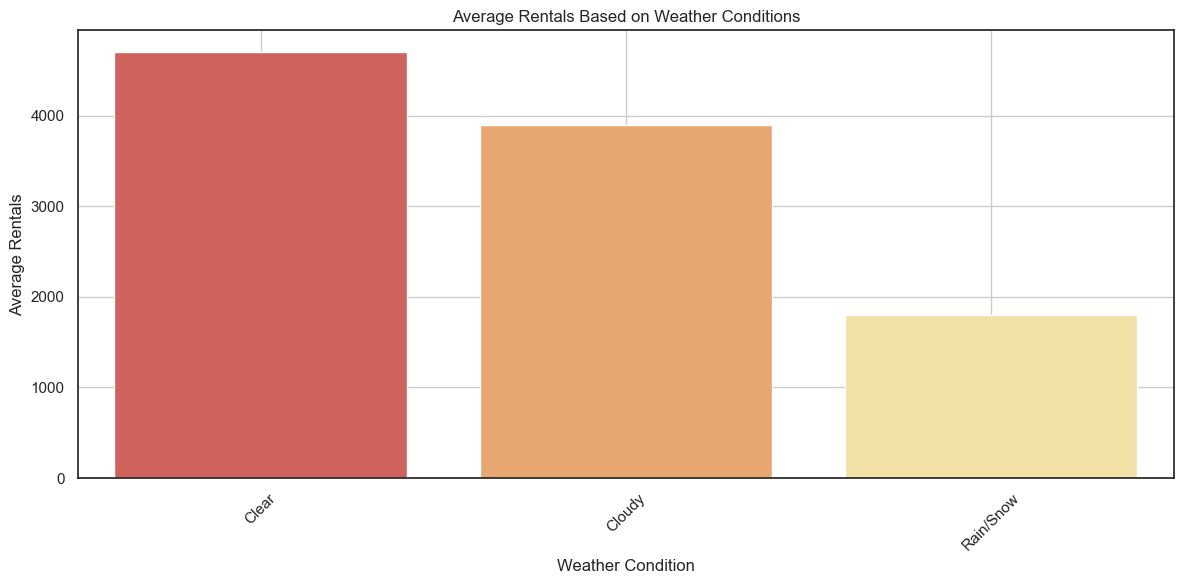

In [29]:
weathersit_map = {
    1: 'Clear',
    2: 'Cloudy',
    3: 'Rain/Snow',
}

weather_stats = day_df.groupby('weathersit')['cnt'].mean().reset_index()
weather_stats['weathersit'] = weather_stats['weathersit'].map(weathersit_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=weather_stats, x='weathersit', y='cnt')
plt.title('Average Rentals Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

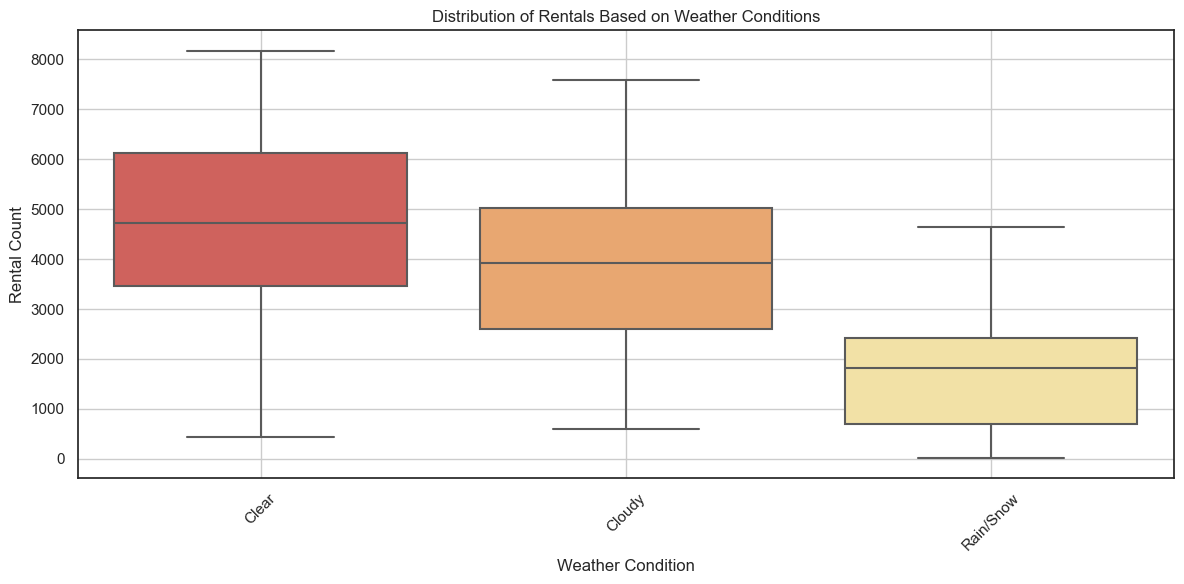

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df, x='weathersit', y='cnt')
plt.title('Distribution of Rentals Based on Weather Conditions')
plt.xlabel('Weather Condition')
plt.ylabel('Rental Count')
plt.xticks(ticks=np.arange(len(weathersit_map)), labels=weathersit_map.values(), rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 3: Apakah hari libur dan hari kerja mempengaruhi penyewaan sepeda?

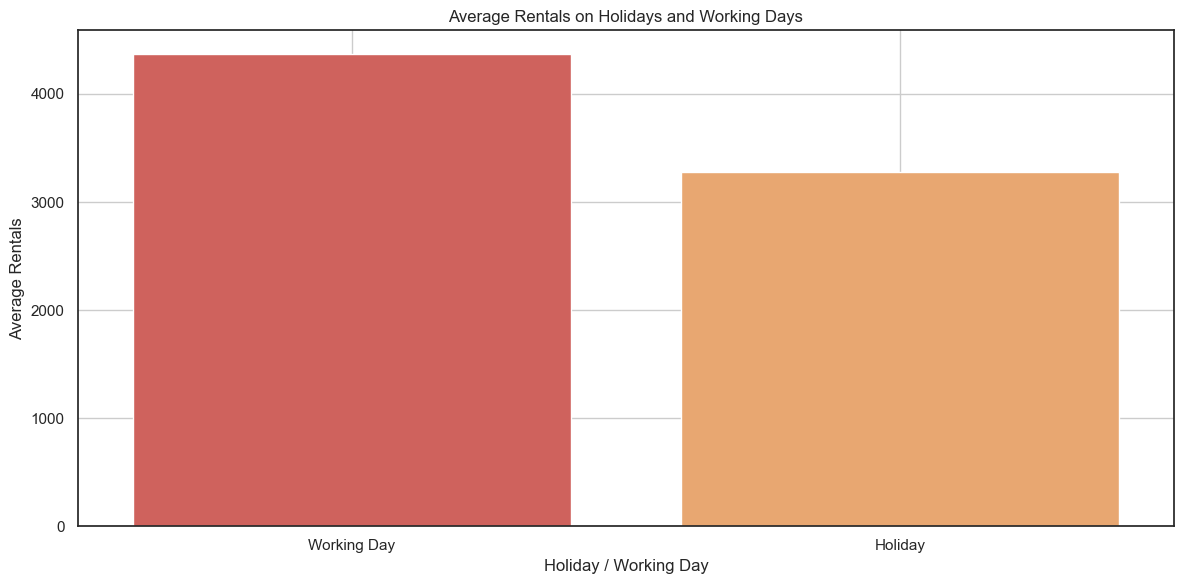

In [31]:
holiday_map = {0: 'Working Day', 1: 'Holiday'}
holiday_stats = day_df.groupby('holiday')['cnt'].mean().reset_index()
holiday_stats['holiday'] = holiday_stats['holiday'].map(holiday_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=holiday_stats, x='holiday', y='cnt')
plt.title('Average Rentals on Holidays and Working Days')
plt.xlabel('Holiday / Working Day')
plt.ylabel('Average Rentals')
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 4: Bagaimana suhu dan kelembapan mempengaruhi penyewaan sepeda? 

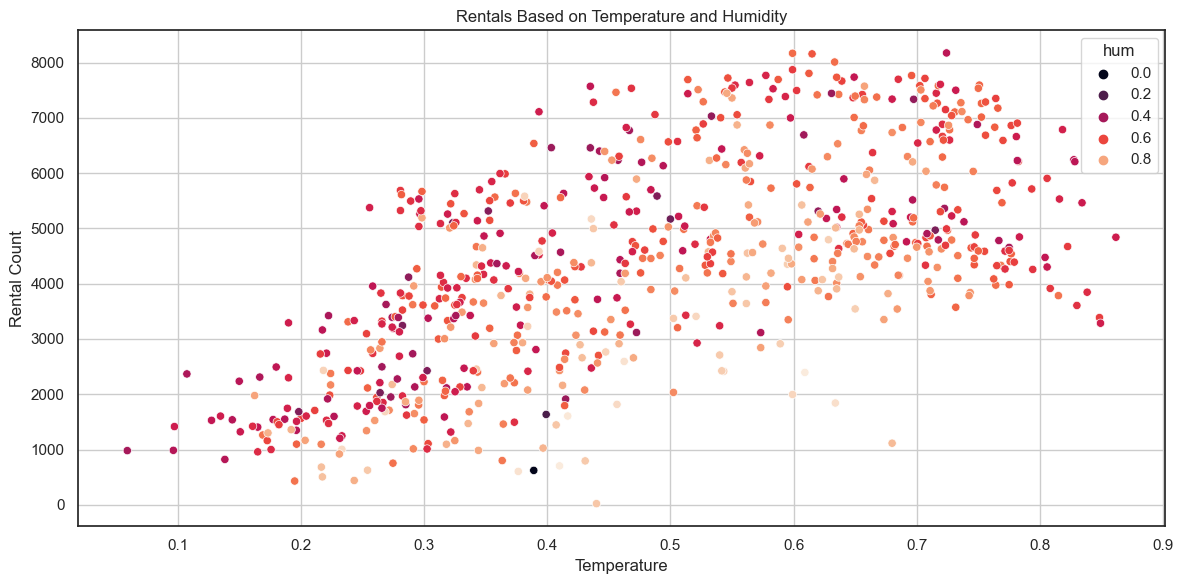

In [32]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=day_df, x='temp', y='cnt', hue='hum', palette='rocket', alpha=1)
plt.title('Rentals Based on Temperature and Humidity')
plt.xlabel('Temperature')
plt.ylabel('Rental Count')
plt.grid(True)
plt.tight_layout()
plt.show()

### Pertanyaan 5: Bagaimana tren penyewaan sepeda berdasarkan tahun dan hari dalam seminggu?

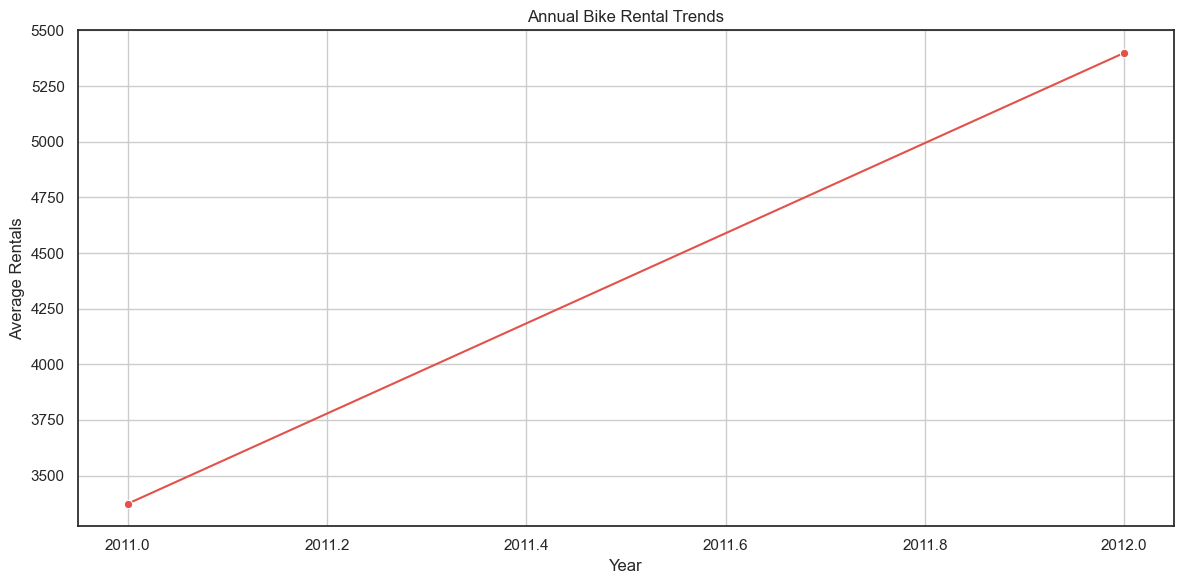

In [33]:
yearly_trends = day_df.groupby('yr')['cnt'].mean().reset_index()
yearly_trends['yr'] = yearly_trends['yr'].map(yr_map)

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_trends, x='yr', y='cnt', marker='o')
plt.title('Annual Bike Rental Trends')
plt.xlabel('Year')
plt.ylabel('Average Rentals')
plt.grid(True)
plt.tight_layout()
plt.show()

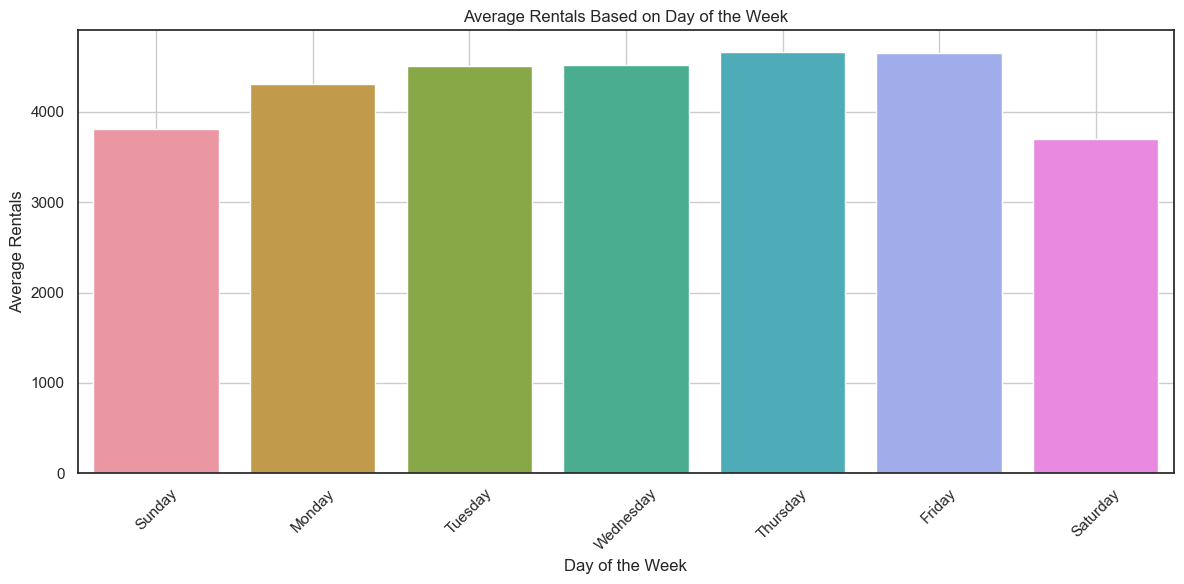

In [34]:
weekday_stats = day_df.groupby('weekday')['cnt'].mean().reset_index()
weekday_stats['weekday'] = weekday_stats['weekday'].map(weekday_map)

plt.figure(figsize=(12, 6))
sns.barplot(data=weekday_stats, x='weekday', y='cnt')
plt.title('Average Rentals Based on Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Rentals')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Conclusion

- Conclution pertanyaan 1
- Conclution pertanyaan 2